<a href="https://colab.research.google.com/github/Arefe-Ehyaee/ML-based-PCF-SPR-sensor/blob/main/PCF_SPR_Scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [ ]:
%cd /content/MyDrive/MyDrive/Sensor/'Adding more features'/normal_output
%ls

/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output
 alldata.csv                               'i6mg too final4 sa.png'
 i2_mse.png                                 ima_neff_delete/
 i2.png                                     newalldata.csv
 i2_regressor.png                          'new fifth55 prediction regressor line.png'
 i5-Loss-Train-Validation-MSE.png          'new fifth55 Prediction test data split.png'
'i5mg last loss.png'                        normal_output_curve.ipynb
'i5mg last SA.png'                          normal_output.ipynb
 i5-vs.png                                  normal_output_na_cureves.ipynb
'i6mg  final sixth66   regressor .png'      normal_output_split_RG.ipynb
'i6mg loss.png'                             rg0.3fortest.csv
'i6mg Loss-Train-Validation-MSE.png'        RNN_normaloutput.ipynb
'i6mg new Prediction test data split.png'  'second Prediction test data split.png'
'i6mg sa.png'                              'second regressor line.png'
'i6mg 

In [ ]:

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

In [ ]:
import pandas as pd
df = pd.read_csv('newalldata.csv')

In [ ]:
df

,w,na,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um)
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,0.000003,3.056809,4.515266,0.3
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,0.000003,3.063131,-12.868908,0.3
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,0.000005,4.052470,19.683089,0.3
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,0.000009,7.402882,36.599197,0.3
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,0.000021,16.947698,48.733377,0.3
...,...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,0.000431,182.042803,NaN,0.6
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,0.000426,177.152433,NaN,0.6
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,0.000432,177.036011,NaN,0.6
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,0.000447,180.528489,NaN,0.6


In [ ]:
newdf = df.sort_values('loss').copy()
newdf

,w,na,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um)
1599,0.60,1.40,1.4519327005618237-7.024813482216739E-7i,1.451933,7.020000e-07,0.652363,NaN,0.6
1558,0.60,1.39,1.4519325884673902-7.309626127239522E-7i,1.451933,7.310000e-07,0.678812,3.896405,0.6
1600,0.62,1.40,1.4509113078361418-7.80200802288685E-7i,1.450911,7.800000e-07,0.701165,NaN,0.6
1517,0.60,1.38,1.4519324747573066-7.699011273013405E-7i,1.451932,7.700000e-07,0.714972,5.057599,0.6
1189,0.60,1.40,1.4519330637980652-7.905850878431848E-7i,1.451933,7.910000e-07,0.719113,NaN,0.5
...,...,...,...,...,...,...,...,...
764,1.12,1.39,1.4295540837326048-9.477747497914565E-4i,1.429554,9.480000e-04,472.000000,88.625580,0.4
1173,1.10,1.39,1.431930576920474-9.556152063707436E-4i,1.431931,9.556150e-04,474.121849,90.047087,0.5
718,1.02,1.38,1.4349522872307174-9.230728634713687E-4i,1.434952,9.230000e-04,504.000000,88.776626,0.4
1223,1.28,1.40,1.4224291542360725-0.0012232530043345521i,1.422429,1.223253e-03,521.561979,NaN,0.5


In [ ]:
newdf['loss_log'] = np.log(newdf['loss'])
newdf['SA(1/RIU)_new_log'] = np.log(newdf['SA(1/RIU)'] + 1000)

newdf['w^2'] = newdf['w'] * newdf['w']
newdf['imag(neff)^2'] = newdf['imag(neff)'] * newdf['imag(neff)']
newdf['na ^2'] = newdf['na '] * newdf['na ']
newdf['rg(um)^2'] = newdf['rg(um)'] * newdf['rg(um)']
#------------------------------------------------------------------
newdf['w^3'] = pow(newdf['w'],3)
newdf['imag(neff)^3'] = pow(newdf['imag(neff)'],3)
newdf['na ^3'] = pow(newdf['na '],3)
newdf['rg(um)^3'] = pow(newdf['rg(um)'],3)
#-----------------------------------------------------------------
newdf['w^4'] = pow(newdf['w'],4)
newdf['imag(neff)^4'] = pow(newdf['imag(neff)'],4)
newdf['na ^4'] = pow(newdf['na '],4)
newdf['rg(um)^4'] = pow(newdf['rg(um)'],4)

In [ ]:
newdf.head(10)

,w,na,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,...,na ^2,rg(um)^2,w^3,imag(neff)^3,na ^3,rg(um)^3,w^4,imag(neff)^4,na ^4,rg(um)^4
1599,0.60,1.40,1.4519327005618237-7.024813482216739E-7i,1.451933,7.020000e-07,0.652363,NaN,0.6,-0.427155,NaN,...,1.9600,0.36,0.216000,3.459484e-19,2.744000,0.216,0.129600,2.428558e-25,3.841600,0.1296
1558,0.60,1.39,1.4519325884673902-7.309626127239522E-7i,1.451933,7.310000e-07,0.678812,3.896405,0.6,-0.387411,6.911644,...,1.9321,0.36,0.216000,3.906179e-19,2.685619,0.216,0.129600,2.855417e-25,3.733010,0.1296
1600,0.62,1.40,1.4509113078361418-7.80200802288685E-7i,1.450911,7.800000e-07,0.701165,NaN,0.6,-0.355012,NaN,...,1.9600,0.36,0.238328,4.745520e-19,2.744000,0.216,0.147763,3.701506e-25,3.841600,0.1296
1517,0.60,1.38,1.4519324747573066-7.699011273013405E-7i,1.451932,7.700000e-07,0.714972,5.057599,0.6,-0.335512,6.912800,...,1.9044,0.36,0.216000,4.565330e-19,2.628072,0.216,0.129600,3.515304e-25,3.626739,0.1296
1189,0.60,1.40,1.4519330637980652-7.905850878431848E-7i,1.451933,7.910000e-07,0.719113,NaN,0.5,-0.329737,NaN,...,1.9600,0.25,0.216000,4.949137e-19,2.744000,0.125,0.129600,3.914767e-25,3.841600,0.0625
1559,0.62,1.39,1.4509111512210933-8.114830839346275E-7i,1.450911,8.110000e-07,0.729278,3.854952,0.6,-0.315700,6.911603,...,1.9321,0.36,0.238328,5.334117e-19,2.685619,0.216,0.147763,4.325969e-25,3.733010,0.1296
1148,0.60,1.39,1.4519329193617827-8.250898694020762E-7i,1.451933,8.250000e-07,0.750498,4.181942,0.5,-0.287018,6.911929,...,1.9321,0.25,0.216000,5.615156e-19,2.685619,0.125,0.129600,4.632504e-25,3.733010,0.0625
1476,0.60,1.37,1.4519323667157218-8.141382489740418E-7i,1.451932,8.140000e-07,0.756053,5.433613,0.6,-0.279644,6.913174,...,1.8769,0.36,0.216000,5.393531e-19,2.571353,0.216,0.129600,4.390335e-25,3.522754,0.1296
1518,0.62,1.38,1.4509109885714069-8.568647746735337E-7i,1.450911,8.570000e-07,0.770063,5.296249,0.6,-0.261283,6.913038,...,1.9044,0.36,0.238328,6.294228e-19,2.628072,0.216,0.147763,5.394153e-25,3.626739,0.1296
1107,0.60,1.38,1.4519327739155954-8.68443972049778E-7i,1.451933,8.680000e-07,0.789933,4.992159,0.5,-0.235807,6.912735,...,1.9044,0.25,0.216000,6.539720e-19,2.628072,0.125,0.129600,5.676477e-25,3.626739,0.0625


In [ ]:
newdf.shape


(1640, 22)

In [ ]:
newdf.describe()

,w,na,re(neff),imag(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,...,na ^2,rg(um)^2,w^3,imag(neff)^3,na ^3,rg(um)^3,w^4,imag(neff)^4,na ^4,rg(um)^4
count,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000,1476.000000,1640.000000,1640.000000,1476.000000,1640.00000,...,1640.000000,1640.00000,1640.000000,1.640000e+03,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000,1640.000000
mean,1.000000,1.355000,1.435310,6.698639e-05,33.936850,-52.470045,0.450000,2.485380,6.837599,1.05600,...,1.836850,0.21500,1.168000,1.808456e-11,2.491167,0.108000,1.341640,1.450420e-14,3.380077,0.056450
std,0.236715,0.028732,0.009469,1.485154e-04,70.336385,134.193606,0.111838,1.317786,0.211020,0.47607,...,0.077866,0.10115,0.749266,1.058322e-10,0.158325,0.071524,1.087453,1.026998e-13,0.286255,0.046589
min,0.600000,1.310000,1.378454,7.020000e-07,0.652363,-933.425313,0.300000,-0.427155,4.198324,0.36000,...,1.716100,0.09000,0.216000,3.459484e-19,2.248091,0.027000,0.129600,2.428558e-25,2.944999,0.008100
25%,0.800000,1.330000,1.427472,8.830000e-06,5.324138,-65.704251,0.375000,1.672251,6.839793,0.64000,...,1.768900,0.14250,0.512000,6.884654e-16,2.352637,0.054750,0.409600,6.079149e-21,3.129007,0.021225
50%,1.000000,1.355000,1.435248,1.910000e-05,9.745017,-11.463914,0.450000,2.276756,6.896225,1.00000,...,1.836050,0.20500,1.000000,6.967871e-15,2.487916,0.094500,1.000000,1.330863e-19,3.371263,0.044050
75%,1.200000,1.380000,1.443050,4.262500e-05,22.962796,11.125778,0.525000,3.133875,6.918820,1.44000,...,1.904400,0.27750,1.728000,7.744520e-14,2.628072,0.147750,2.073600,3.301112e-18,3.626739,0.079275
max,1.400000,1.400000,1.451934,1.223253e-03,550.855615,90.047087,0.600000,6.311473,6.993976,1.96000,...,1.960000,0.36000,2.744000,1.830412e-09,2.744000,0.216000,3.841600,2.239057e-12,3.841600,0.129600


In [ ]:
newdf.isnull().sum()

w                      0
na                     0
neff                   0
re(neff)               0
imag(neff)             0
loss                   0
SA(1/RIU)            164
rg(um)                 0
loss_log               0
SA(1/RIU)_new_log    164
w^2                    0
imag(neff)^2           0
na ^2                  0
rg(um)^2               0
w^3                    0
imag(neff)^3           0
na ^3                  0
rg(um)^3               0
w^4                    0
imag(neff)^4           0
na ^4                  0
rg(um)^4               0
dtype: int64

In [ ]:
newdf = newdf.dropna(axis = 0)

In [ ]:
newdf.isnull().sum()

w                    0
na                   0
neff                 0
re(neff)             0
imag(neff)           0
loss                 0
SA(1/RIU)            0
rg(um)               0
loss_log             0
SA(1/RIU)_new_log    0
w^2                  0
imag(neff)^2         0
na ^2                0
rg(um)^2             0
w^3                  0
imag(neff)^3         0
na ^3                0
rg(um)^3             0
w^4                  0
imag(neff)^4         0
na ^4                0
rg(um)^4             0
dtype: int64

In [ ]:
newdf.shape

(1476, 22)

In [ ]:
#del newdf

In [ ]:
newdf_train = newdf.loc[np.logical_not(newdf['rg(um)']==0.3)]
newdf_train

,w,na,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,...,na ^2,rg(um)^2,w^3,imag(neff)^3,na ^3,rg(um)^3,w^4,imag(neff)^4,na ^4,rg(um)^4
1558,0.60,1.39,1.4519325884673902-7.309626127239522E-7i,1.451933,7.310000e-07,0.678812,3.896405,0.6,-0.387411,6.911644,...,1.9321,0.36,0.216000,3.906179e-19,2.685619,0.216,0.129600,2.855417e-25,3.733010,0.1296
1517,0.60,1.38,1.4519324747573066-7.699011273013405E-7i,1.451932,7.700000e-07,0.714972,5.057599,0.6,-0.335512,6.912800,...,1.9044,0.36,0.216000,4.565330e-19,2.628072,0.216,0.129600,3.515304e-25,3.626739,0.1296
1559,0.62,1.39,1.4509111512210933-8.114830839346275E-7i,1.450911,8.110000e-07,0.729278,3.854952,0.6,-0.315700,6.911603,...,1.9321,0.36,0.238328,5.334117e-19,2.685619,0.216,0.147763,4.325969e-25,3.733010,0.1296
1148,0.60,1.39,1.4519329193617827-8.250898694020762E-7i,1.451933,8.250000e-07,0.750498,4.181942,0.5,-0.287018,6.911929,...,1.9321,0.25,0.216000,5.615156e-19,2.685619,0.125,0.129600,4.632504e-25,3.733010,0.0625
1476,0.60,1.37,1.4519323667157218-8.141382489740418E-7i,1.451932,8.140000e-07,0.756053,5.433613,0.6,-0.279644,6.913174,...,1.8769,0.36,0.216000,5.393531e-19,2.571353,0.216,0.129600,4.390335e-25,3.522754,0.1296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1.14,1.39,1.4307390992798776-7.458529587687045E-4i,1.430739,7.460000e-04,365.000000,80.865981,0.4,5.899897,6.985518,...,1.9321,0.16,1.481544,4.151609e-10,2.685619,0.064,1.688960,3.097101e-13,3.733010,0.0256
673,0.94,1.37,1.437552713963742-6.230495590851772E-4i,1.437553,6.230000e-04,369.000000,85.131406,0.4,5.910797,6.989456,...,1.8769,0.16,0.830584,2.418044e-10,2.571353,0.064,0.780749,1.506441e-13,3.522754,0.0256
764,1.12,1.39,1.4295540837326048-9.477747497914565E-4i,1.429554,9.480000e-04,472.000000,88.625580,0.4,6.156979,6.992671,...,1.9321,0.16,1.404928,8.519714e-10,2.685619,0.064,1.573519,8.076689e-13,3.733010,0.0256
1173,1.10,1.39,1.431930576920474-9.556152063707436E-4i,1.431931,9.556150e-04,474.121849,90.047087,0.5,6.161464,6.993976,...,1.9321,0.25,1.331000,8.726676e-10,2.685619,0.125,1.464100,8.339343e-13,3.733010,0.0625


In [ ]:
y = newdf_train[['loss_log','SA(1/RIU)_new_log']]

In [ ]:
newdf_train.columns

Index(['w', 'na ', 'neff', 're(neff)', 'imag(neff)', 'loss', 'SA(1/RIU)',
       'rg(um)', 'loss_log', 'SA(1/RIU)_new_log', 'w^2', 'imag(neff)^2',
       'na ^2', 'rg(um)^2', 'w^3', 'imag(neff)^3', 'na ^3', 'rg(um)^3', 'w^4',
       'imag(neff)^4', 'na ^4', 'rg(um)^4'],
      dtype='object')

In [ ]:
x = newdf_train[['w', 'na ', 'imag(neff)','rg(um)','w^2','imag(neff)^2','na ^2','rg(um)^2','w^3','imag(neff)^3','na ^3','rg(um)^3', 'w^4', 'imag(neff)^4', 'na ^4', 'rg(um)^4']]

In [ ]:
x.shape

(1107, 16)

In [ ]:
x

,w,na,imag(neff),rg(um),w^2,imag(neff)^2,na ^2,rg(um)^2,w^3,imag(neff)^3,na ^3,rg(um)^3,w^4,imag(neff)^4,na ^4,rg(um)^4
1558,0.60,1.39,7.310000e-07,0.6,0.3600,5.343610e-13,1.9321,0.36,0.216000,3.906179e-19,2.685619,0.216,0.129600,2.855417e-25,3.733010,0.1296
1517,0.60,1.38,7.700000e-07,0.6,0.3600,5.929000e-13,1.9044,0.36,0.216000,4.565330e-19,2.628072,0.216,0.129600,3.515304e-25,3.626739,0.1296
1559,0.62,1.39,8.110000e-07,0.6,0.3844,6.577210e-13,1.9321,0.36,0.238328,5.334117e-19,2.685619,0.216,0.147763,4.325969e-25,3.733010,0.1296
1148,0.60,1.39,8.250000e-07,0.5,0.3600,6.806250e-13,1.9321,0.25,0.216000,5.615156e-19,2.685619,0.125,0.129600,4.632504e-25,3.733010,0.0625
1476,0.60,1.37,8.140000e-07,0.6,0.3600,6.625960e-13,1.8769,0.36,0.216000,5.393531e-19,2.571353,0.216,0.129600,4.390335e-25,3.522754,0.1296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1.14,1.39,7.460000e-04,0.4,1.2996,5.565160e-07,1.9321,0.16,1.481544,4.151609e-10,2.685619,0.064,1.688960,3.097101e-13,3.733010,0.0256
673,0.94,1.37,6.230000e-04,0.4,0.8836,3.881290e-07,1.8769,0.16,0.830584,2.418044e-10,2.571353,0.064,0.780749,1.506441e-13,3.522754,0.0256
764,1.12,1.39,9.480000e-04,0.4,1.2544,8.987040e-07,1.9321,0.16,1.404928,8.519714e-10,2.685619,0.064,1.573519,8.076689e-13,3.733010,0.0256
1173,1.10,1.39,9.556150e-04,0.5,1.2100,9.132000e-07,1.9321,0.25,1.331000,8.726676e-10,2.685619,0.125,1.464100,8.339343e-13,3.733010,0.0625


In [ ]:
y

,loss_log,SA(1/RIU)_new_log
1558,-0.387411,6.911644
1517,-0.335512,6.912800
1559,-0.315700,6.911603
1148,-0.287018,6.911929
1476,-0.279644,6.913174
...,...,...
765,5.899897,6.985518
673,5.910797,6.989456
764,6.156979,6.992671
1173,6.161464,6.993976


In [ ]:
x_norm = (x - x.mean()) / x.std()
x_norm

,w,na,imag(neff),rg(um),w^2,imag(neff)^2,na ^2,rg(um)^2,w^3,imag(neff)^3,na ^3,rg(um)^3,w^4,imag(neff)^4,na ^4,rg(um)^4
1558,-1.689545,1.548493,-0.483524,1.224192,-1.461756,-0.179952,1.561821,1.262895,-1.270391,-0.113423,1.575149,1.296341,-1.114404,-0.087354,1.588474,1.324206
1517,-1.689545,1.161370,-0.483109,1.224192,-1.461756,-0.179951,1.164675,1.262895,-1.270391,-0.113423,1.167836,1.296341,-1.114404,-0.087354,1.170851,1.324206
1559,-1.605068,1.548493,-0.482673,1.224192,-1.410510,-0.179950,1.561821,1.262895,-1.240595,-0.113423,1.575149,1.296341,-1.097704,-0.087354,1.588474,1.324206
1148,-1.689545,1.548493,-0.482524,0.000000,-1.461756,-0.179949,1.561821,-0.081477,-1.270391,-0.113423,1.575149,-0.160042,-1.114404,-0.087354,1.588474,-0.233729
1476,-1.689545,0.774247,-0.482641,1.224192,-1.461756,-0.179950,0.770396,1.262895,-1.270391,-0.113423,0.766383,1.296341,-1.114404,-0.087354,0.762209,1.324206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0.591341,1.548493,7.449659,-1.224192,0.511614,8.968216,1.561821,-1.181418,0.418407,8.286705,1.575149,-1.136299,0.319341,7.000103,1.588474,-1.090477
673,-0.253432,0.774247,6.140358,-1.224192,-0.362079,6.200220,0.770396,-1.181418,-0.450263,4.779108,0.766383,-1.136299,-0.515709,3.360011,0.762209,-1.090477
764,0.506863,1.548493,9.599893,-1.224192,0.416684,14.593205,1.561821,-1.181418,0.316167,17.124878,1.575149,-1.136299,0.213200,18.395476,1.588474,-1.090477
1173,0.422386,1.548493,9.680952,0.000000,0.323434,14.831495,1.561821,-0.081477,0.217514,17.543634,1.575149,-0.160042,0.112595,18.996538,1.588474,-0.233729


In [ ]:
n_cols = x.shape[1]
n_cols

16

In [ ]:
# define regression model
def regression_model(lr=0.00001):
    # create model
    tf.keras.utils.set_random_seed(42)
    init = initializers.RandomNormal(stddev=0.1)
    biass = initializers.Zeros()
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(n_cols,), kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(2, kernel_initializer=init , bias_initializer = biass))

    # compile model
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    metric = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    loss_log = tf.keras.losses.MeanSquaredLogarithmicError(reduction="auto", name="mean_squared_logarithmic_error")
    model.compile(optimizer=opt, loss=loss_log , metrics=[metric])
    return model

In [ ]:
mytestdf = pd.read_csv('rg0.3fortest.csv')

In [ ]:
mytest = mytestdf.sort_values('loss').copy()
mytest

,w,n_analyte,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um)
328,0.60,1.39,1.451934050199855-1.2723117105572797E-6i,1.451934,0.000001,1.181538,-6.276309,0.3
370,0.62,1.40,1.450912646612888-1.321118859048586E-6i,1.450913,0.000001,1.187287,NaN,0.3
287,0.60,1.38,1.4519337039958076-1.2822217381133672E-6i,1.451934,0.000001,1.190741,0.772879,0.3
369,0.60,1.40,1.4519343517814984-1.3521659287242782E-6i,1.451934,0.000001,1.255695,NaN,0.3
246,0.60,1.37,1.4519333450807974-1.366682682915366E-6i,1.451933,0.000001,1.269176,6.179997,0.3
...,...,...,...,...,...,...,...,...
404,1.30,1.40,1.4204281045544709-9.672421454291909E-4i,1.420428,0.000967,414.569475,NaN,0.3
405,1.32,1.40,1.4191765669448466-0.0010050548801564493i,1.419177,0.001005,424.249469,NaN,0.3
354,1.12,1.39,1.4319042263034603-8.673205396411292E-4i,1.431904,0.000867,431.486360,82.480029,0.3
308,1.02,1.38,1.4352497283104673-8.343863067222522E-4i,1.435250,0.000834,455.798046,85.062343,0.3


In [ ]:
mytest['na '] = mytest['n_analyte']
del mytest['n_analyte']

In [ ]:
mytest

,w,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um),na
328,0.60,1.451934050199855-1.2723117105572797E-6i,1.451934,0.000001,1.181538,-6.276309,0.3,1.39
370,0.62,1.450912646612888-1.321118859048586E-6i,1.450913,0.000001,1.187287,NaN,0.3,1.40
287,0.60,1.4519337039958076-1.2822217381133672E-6i,1.451934,0.000001,1.190741,0.772879,0.3,1.38
369,0.60,1.4519343517814984-1.3521659287242782E-6i,1.451934,0.000001,1.255695,NaN,0.3,1.40
246,0.60,1.4519333450807974-1.366682682915366E-6i,1.451933,0.000001,1.269176,6.179997,0.3,1.37
...,...,...,...,...,...,...,...,...
404,1.30,1.4204281045544709-9.672421454291909E-4i,1.420428,0.000967,414.569475,NaN,0.3,1.40
405,1.32,1.4191765669448466-0.0010050548801564493i,1.419177,0.001005,424.249469,NaN,0.3,1.40
354,1.12,1.4319042263034603-8.673205396411292E-4i,1.431904,0.000867,431.486360,82.480029,0.3,1.39
308,1.02,1.4352497283104673-8.343863067222522E-4i,1.435250,0.000834,455.798046,85.062343,0.3,1.38


In [ ]:
mytest['loss_log'] = np.log(mytest['loss'])
mytest['SA(1/RIU)_new_log'] = np.log(mytest['SA(1/RIU)'] + 1000)

mytest['w^2'] = mytest['w'] * mytest['w']
mytest['imag(neff)^2'] = mytest['imag(neff)'] * mytest['imag(neff)']
mytest['na ^2'] = mytest['na '] * mytest['na ']
mytest['rg(um)^2'] = mytest['rg(um)'] * mytest['rg(um)']
#------------------------------------------------------------------
mytest['w^3'] = pow(mytest['w'],3)
mytest['imag(neff)^3'] = pow(mytest['imag(neff)'],3)
mytest['na ^3'] = pow(mytest['na '],3)
mytest['rg(um)^3'] = pow(mytest['rg(um)'],3)
#-----------------------------------------------------------------
mytest['w^4'] = pow(mytest['w'],4)
mytest['imag(neff)^4'] = pow(mytest['imag(neff)'],4)
mytest['na ^4'] = pow(mytest['na '],4)
mytest['rg(um)^4'] = pow(mytest['rg(um)'],4)

In [ ]:
mytest

,w,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um),na,loss_log,SA(1/RIU)_new_log,...,na ^2,rg(um)^2,w^3,imag(neff)^3,na ^3,rg(um)^3,w^4,imag(neff)^4,na ^4,rg(um)^4
328,0.60,1.451934050199855-1.2723117105572797E-6i,1.451934,0.000001,1.181538,-6.276309,0.3,1.39,0.166817,6.901459,...,1.9321,0.09,0.216000,2.048383e-18,2.685619,0.027,0.129600,2.601446e-24,3.733010,0.0081
370,0.62,1.450912646612888-1.321118859048586E-6i,1.450913,0.000001,1.187287,NaN,0.3,1.40,0.171671,NaN,...,1.9600,0.09,0.238328,2.299968e-18,2.744000,0.027,0.147763,3.035958e-24,3.841600,0.0081
287,0.60,1.4519337039958076-1.2822217381133672E-6i,1.451934,0.000001,1.190741,0.772879,0.3,1.38,0.174576,6.908528,...,1.9044,0.09,0.216000,2.097152e-18,2.628072,0.027,0.129600,2.684355e-24,3.626739,0.0081
369,0.60,1.4519343517814984-1.3521659287242782E-6i,1.451934,0.000001,1.255695,NaN,0.3,1.40,0.227689,NaN,...,1.9600,0.09,0.216000,2.460375e-18,2.744000,0.027,0.129600,3.321506e-24,3.841600,0.0081
246,0.60,1.4519333450807974-1.366682682915366E-6i,1.451933,0.000001,1.269176,6.179997,0.3,1.37,0.238368,6.913916,...,1.8769,0.09,0.216000,2.571353e-18,2.571353,0.027,0.129600,3.522754e-24,3.522754,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1.30,1.4204281045544709-9.672421454291909E-4i,1.420428,0.000967,414.569475,NaN,0.3,1.40,6.027241,NaN,...,1.9600,0.09,2.197000,9.049101e-10,2.744000,0.027,2.856100,8.752671e-13,3.841600,0.0081
405,1.32,1.4191765669448466-0.0010050548801564493i,1.419177,0.001005,424.249469,NaN,0.3,1.40,6.050322,NaN,...,1.9600,0.09,2.299968,1.015242e-09,2.744000,0.027,3.035958,1.020374e-12,3.841600,0.0081
354,1.12,1.4319042263034603-8.673205396411292E-4i,1.431904,0.000867,431.486360,82.480029,0.3,1.39,6.067236,6.987010,...,1.9321,0.09,1.404928,6.524385e-10,2.685619,0.027,1.573519,5.658736e-13,3.733010,0.0081
308,1.02,1.4352497283104673-8.343863067222522E-4i,1.435250,0.000834,455.798046,85.062343,0.3,1.38,6.122050,6.989393,...,1.9044,0.09,1.061208,5.808995e-10,2.628072,0.027,1.082432,4.846944e-13,3.626739,0.0081


In [ ]:
mytest.isnull().sum()

w                     0
neff                  0
re(neff)              0
imag(neff)            0
loss                  0
SA(1/RIU)            41
rg(um)                0
na                    0
loss_log              0
SA(1/RIU)_new_log    41
w^2                   0
imag(neff)^2          0
na ^2                 0
rg(um)^2              0
w^3                   0
imag(neff)^3          0
na ^3                 0
rg(um)^3              0
w^4                   0
imag(neff)^4          0
na ^4                 0
rg(um)^4              0
dtype: int64

In [ ]:
mytest = mytest.dropna(axis = 0)

In [ ]:
X_testt = mytest[['w', 'na ', 'imag(neff)','rg(um)','w^2','imag(neff)^2','na ^2','rg(um)^2','w^3','imag(neff)^3','na ^3','rg(um)^3', 'w^4', 'imag(neff)^4', 'na ^4', 'rg(um)^4']]
y_test = mytest[['loss_log','SA(1/RIU)_new_log']]

In [ ]:
X_test = (X_testt - X_testt.mean()) / X_testt.std()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x_norm, y, test_size=0.2 , shuffle= True)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(885, 16)
(885, 2)
(222, 16)
(222, 2)
(369, 16)
(369, 2)


In [ ]:
y_train

,loss_log,SA(1/RIU)_new_log
448,2.468100,6.912644
459,3.648057,6.737674
830,1.878290,6.820044
1230,0.124691,6.916431
1505,2.472532,6.834892
...,...,...
1075,1.790584,6.920273
746,2.302585,6.633932
1284,1.847296,6.839791
1325,2.352342,6.786492


In [ ]:
model = regression_model(0.0005)
# fit the model
import time
t0 = time.time()
history2 = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_valid, y_valid))
print("seconds passed: ", time.time()-t0)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/1000
89/89 [==============================] - 2s 8ms/step - loss: 1.8668 - mean_squared_error: 21.8072 - val_loss: 0.3869 - val_mean_squared_error: 8.9778
Epoch 2/1000
89/89 [==============================] - 0s 5ms/step - loss: 0.1692 - mean_squared_error: 3.9348 - val_loss: 0.1049 - val_mean_squared_error: 2.0929
Epoch 3/1000
89/89 [==============================] - 0s 5ms/step - loss: 0.0964 - mean_squared_error: 2.3443 - val_loss: 0.0927 - val_mean_squared_error: 1.8941
Epoch 4/1000
89/89 [==============================] - 0s 5ms/step - loss: 0.0858 - mean_squared_error: 1.8754 - val_loss: 0.0835 - val_mean_squared_error: 1.6349
Epoch 5/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.0765 - mean_squared_error: 1.4789 - val_loss: 0.0738 - val_mean_squared_error: 1.4070
Epoch 6/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.0666 - mean_squared_error: 1.2152 - val_loss: 0.0624 - val_mean_squared_error: 0.9971
Epoch 7/1000
89/89 [=======

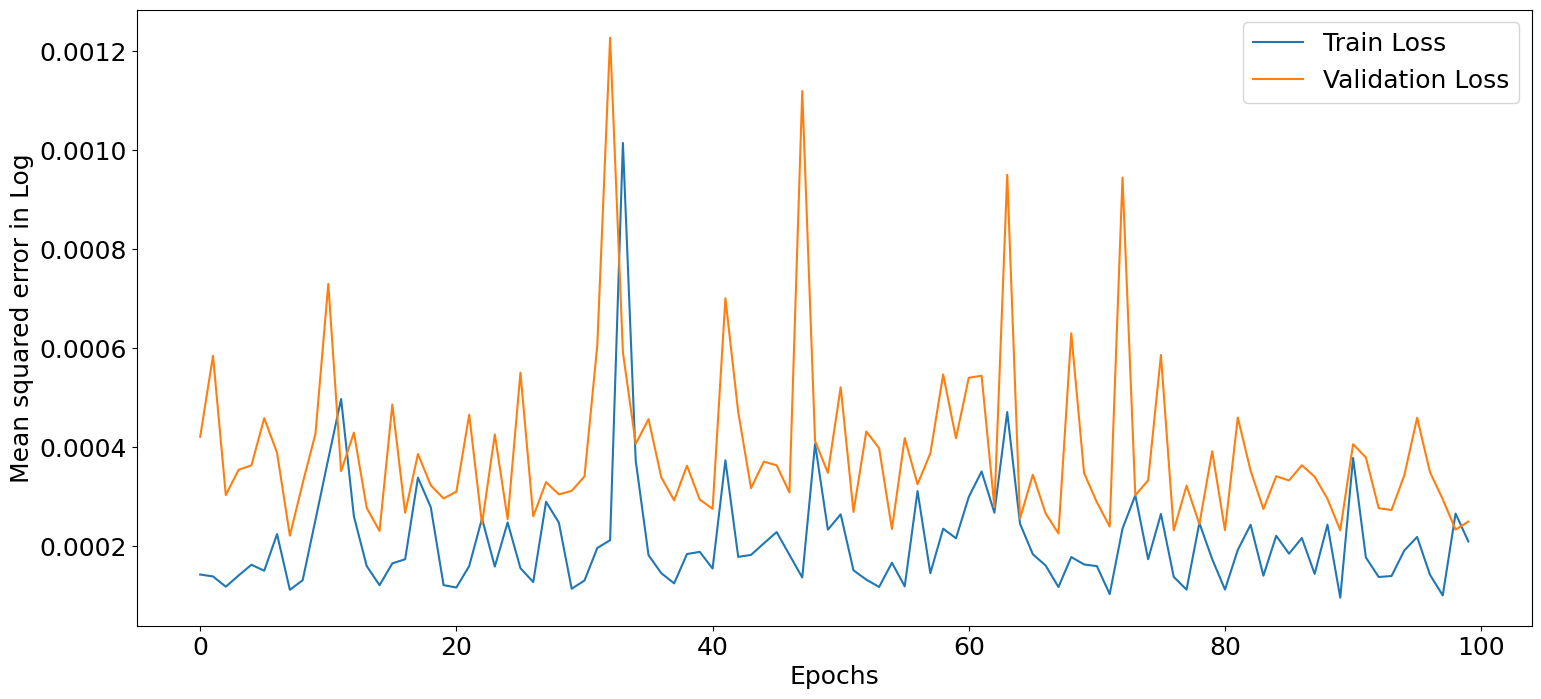

In [ ]:
plt.figure(figsize=(18,8))

plt.plot(history2.history['loss'][900:1000])
plt.plot(history2.history['val_loss'][900:1000])

#plt.yscale('log')

plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
#plt.set_title('Train Loss',fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Mean squared error in Log',fontsize=18)
plt.legend(['Train Loss', 'Validation Loss'], fontsize=18)
#plt.savefig('ii2.png', format='png')

In [ ]:
# evaluation - keras / sklearn
eval = model.evaluate(X_test, y_test, batch_size=1)
eval

369/369 [==============================] - 1s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0848


[0.009886358864605427, 0.08476676791906357]

In [ ]:
y_predict_test = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [ ]:
t1 = time.time()
y_predict_test.shape
print("seconds passed: ", time.time()-t1)

seconds passed:  0.00014281272888183594


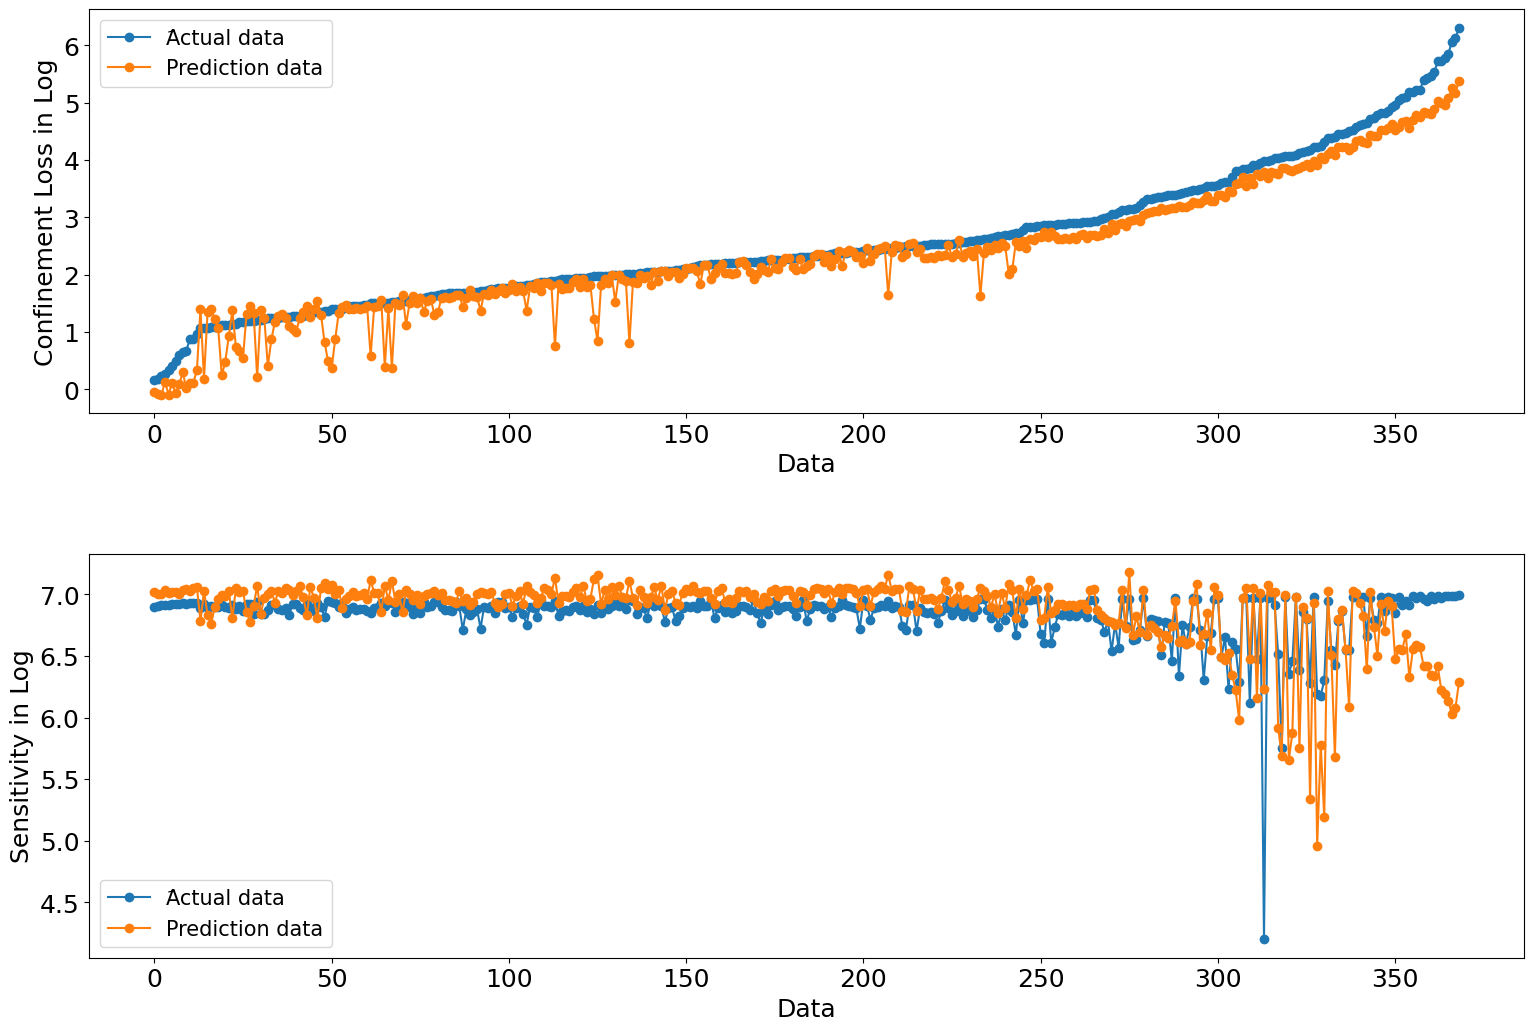

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(17,12))
fig.tight_layout(pad=8.0)

ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)
ax[0].plot(range(369), y_test['loss_log'][:369], '-o', label='َActual data')
ax[0].plot(range(369), y_predict_test[:369,0], '-o', label='Prediction data')
ax[0].set_xlabel('Data',fontsize=18)
ax[0].set_ylabel('Confinement Loss in Log',fontsize=18)
ax[0].legend(prop={'size': 15})

ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)
ax[1].plot(range(369), y_test['SA(1/RIU)_new_log'][:369], '-o', label='َActual data')
ax[1].plot(range(369), y_predict_test[:369,1], '-o', label='Prediction data')
ax[1].set_xlabel('Data',fontsize=18)
ax[1].set_ylabel('Sensitivity in Log',fontsize=18)
ax[1].legend(prop={'size': 15})
fig.savefig('ii2_mse.png', format='png')

12/12 [==============================] - 0s 2ms/step


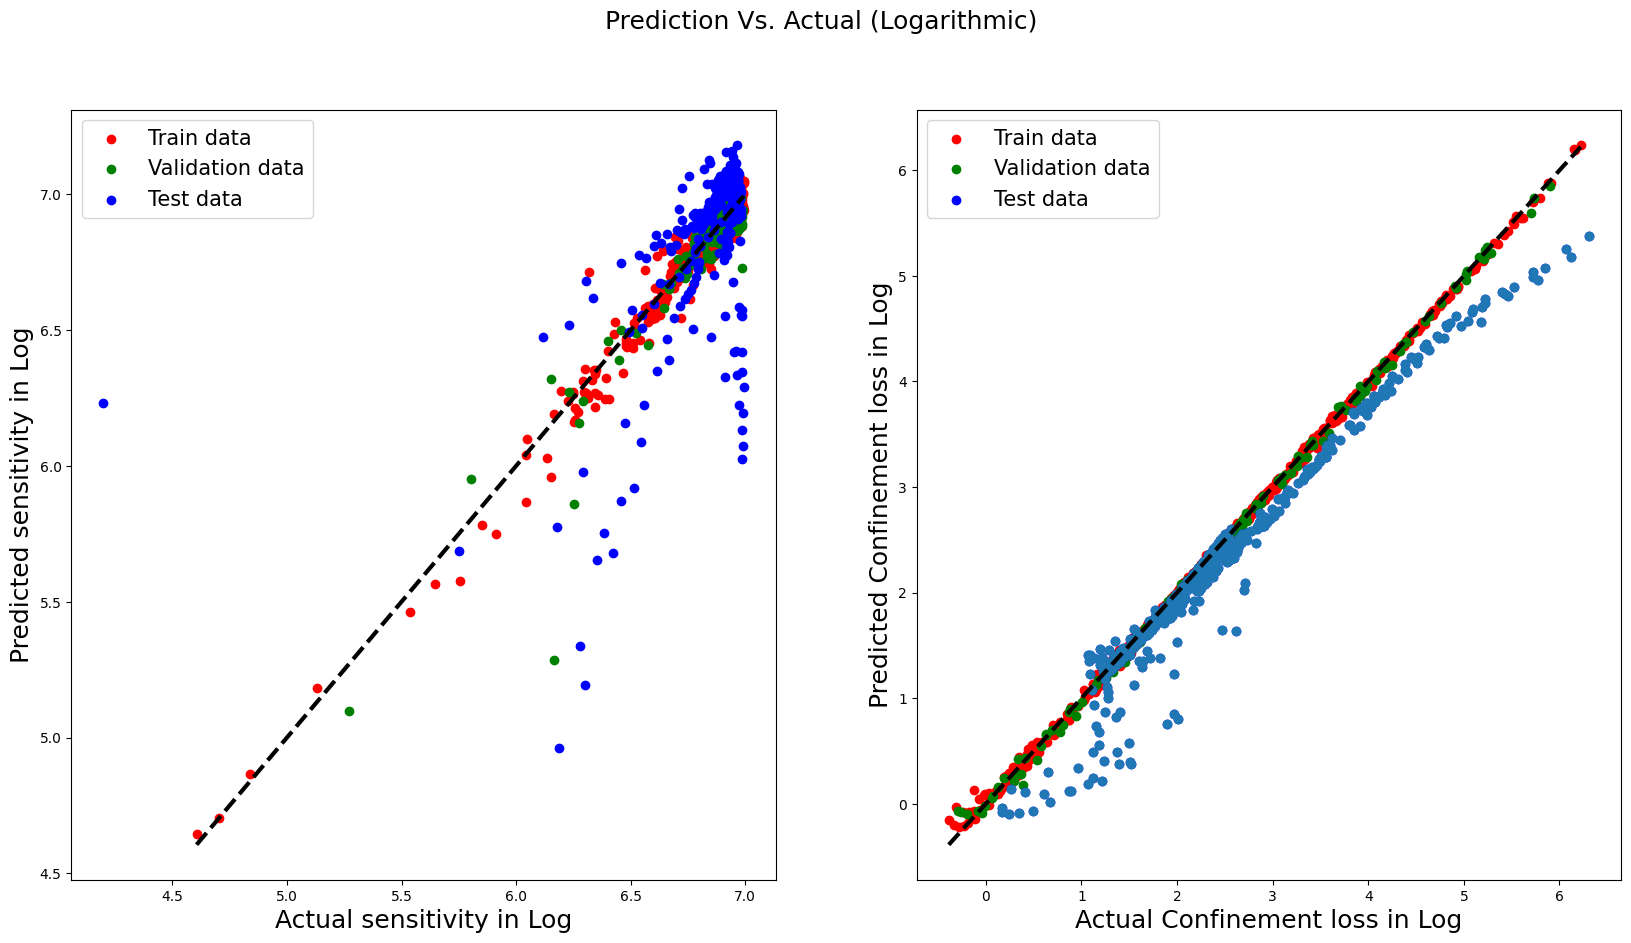

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Prediction Vs. Actual (Logarithmic)',fontsize=18)

y_predict_train = model.predict(X_train)
y_predict_valid = model.predict(X_valid)
y_predict_test = model.predict(X_test)

ax[0].scatter(y_train['SA(1/RIU)_new_log'], y_predict_train[:,1], label = 'Train data', color = 'red')
ax[0].scatter(y_valid['SA(1/RIU)_new_log'], y_predict_valid[:,1], label = 'Validation data', color = 'green')
ax[0].scatter(y_test['SA(1/RIU)_new_log'], y_predict_test[:,1], label = 'Test data', color = 'blue')

ax[0].plot([y['SA(1/RIU)_new_log'].min(), y['SA(1/RIU)_new_log'].max()], [y['SA(1/RIU)_new_log'].min(), y['SA(1/RIU)_new_log'].max()], 'k--', lw=3)
ax[0].set_xlabel('Actual sensitivity in Log',fontsize=18)
ax[0].set_ylabel('Predicted sensitivity in Log',fontsize=18)
ax[0].legend(prop={'size': 15})

ax[1].scatter(y_train['loss_log'], y_predict_train[:,0], label = 'Train data', color = 'red')
ax[1].scatter(y_valid['loss_log'], y_predict_valid[:,0], label = 'Validation data', color = 'green')
ax[1].scatter(y_test['loss_log'], y_predict_test[:,0], label = 'Test data', color = 'blue')

ax[1].scatter(y_test['loss_log'], y_predict_test[:,0])
ax[1].plot([y['loss_log'].min(), y['loss_log'].max()], [y['loss_log'].min(), y['loss_log'].max()], 'k--', lw=3)
ax[1].set_xlabel('Actual Confinement loss in Log',fontsize=18)
ax[1].set_ylabel('Predicted Confinement loss in Log',fontsize=18)
ax[1].legend(prop={'size': 15})
fig.savefig('ii2_regressor.png', format='png')